In [2]:
import os
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sb
import matplotlib.pyplot as plt
from ipynb.fs.full.MyFuntions import *
alt.data_transformers.disable_max_rows()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Earthquake Damage
Integrantes
<ul>
    <li>Carlos Guerra<\li>
    <li>Nicolás Muñoz<\li>
    <li>Gerald Méndez<\li>
<\ul>

![](https://static01.nyt.com/images/2015/05/06/world/asia/20150507-NEPAL-slide-W9W4/20150507-NEPAL-slide-W9W4-master675.jpg)

Los terremotos han sido desde hace mucho tiempo un fenómeno imposible de predecir, de modo que lo que podemos hacer es prepararnos adecuadamente para enferentarlos con la menor cantidad de heridos.

Es por ello que utilizaremos la data [Earthquake Damage](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage?select=train_values.csv) para generar un modelo que prediga el daño que recibiría una construcción ante un evento telúrico de magnitudes similares a las de Nepal en 2015 (7.8 Richter).

Para así poder adelantarse a ello, mejorar o bien derribar, las construcciones que sean necesarias.

![](https://cdn.britannica.com/90/182390-050-00B7AB0F/earthquake-Map-Nepal-region-temblor-thousands-people-April-25-2015.jpg)

### Valores objetivo

| Tipo 1 | Tipo 2 | Tipo 3 |
|---|---|---|
| ![](https://ep00.epimg.net/elpais/imagenes/2015/04/27/album/1430134879_926643_1430135569_album_normal.jpg) | ![](https://www.jordicorominas.es/media/zoo/applications/abacImages/assets/php/aigua.php?src=https://www.jordicorominas.es/images/galerias/2015-terremoto-nepal/Terremoto%20Nepal%202015%20-%2010.JPG) | ![](https://www.desnivel.com/images/2015/05/nepal-22.jpg) |

## Modelo de Clasificación

![](https://pbs.twimg.com/media/DPIfUygXcAEDyQE.png)

# Dataset

In [3]:
y_test = pd.read_csv(os.path.join("..", "data", "submission_format.csv"))
X_test = pd.read_csv(os.path.join("..", "data", "test_values.csv"))
y_train = pd.read_csv(os.path.join("..", "data", "train_labels.csv"))
X_train = pd.read_csv(os.path.join("..", "data", "train_values.csv"))
X_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


#### Una Dataset de 260.601 datos y 38 columnas de información

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


39 Columnas
<ul>
    <li>8 columnas categóricas<\li>
    <li>22 columnas binarias<\li>
    <li>1 columna de ID<\li>
    <li>8 columnas numéricas no binarias<\li>
<\ul>

In [5]:
show_variables(X_train)

,columna,elementos,cantidad
0,building_id,-,260601
1,geo_level_1_id,-,31
2,geo_level_2_id,-,1414
3,geo_level_3_id,-,11595
4,count_floors_pre_eq,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",9
5,age,-,42
6,area_percentage,-,84
7,height_percentage,-,27
8,land_surface_condition,"[n, o, t]",3
9,foundation_type,"[h, i, r, u, w]",5


# Visualización
Los siguientes graficos nos muestran si existe alguna relación clara entre algunas de las caracteristicas de los edificios y el grado de daño que sufrio por el terremoto.

### Cantidad de edificios que sufrieron cierto grado de daño

<AxesSubplot:xlabel='damage_grade', ylabel='count'>

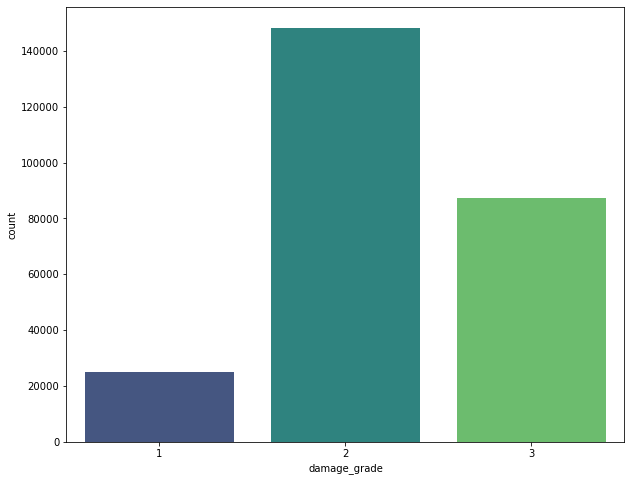

In [6]:
plt.figure(figsize=(10,8))
sb.countplot(x=y_train["damage_grade"], palette="viridis")

### Antiguedad del edificio 
Se separan los edificios por edad y se grafica el porcentaje de edificios de cierta edad que sufrieron cierto grado de daño. Por ejemplo, en el grupo los edificios de 5 años de antiguedad, alrededor del 60% de estos sufrieron un daño de grado 2, menos del 20% sufrieron un daño de grado 1, etc. Observamos que mientras mas antiguo el edificio, aumenta el porcentaje de edificios que sufrieron daño de grado 2 y 3, y disminuye el porcentaje de edificios que sufrieron daño de grado 1.

In [7]:
train=X_train.merge(y_train, on="building_id")
values = X_train["age"].unique()
d = {"percentage": [], "age" : [], "damage_grade": []}
for val in values:
    tot = train.query(f"age == {val}").count().unique()[0]
    for dam in [1,2,3]:
        part = train.query(f"age == {val}").query(f"damage_grade == {dam}").count().unique()[0]
        d["percentage"].append(part/tot)
        d["age"].append(val)
        d["damage_grade"].append(dam)
aux = pd.DataFrame(d, index = range(len(d["percentage"])))

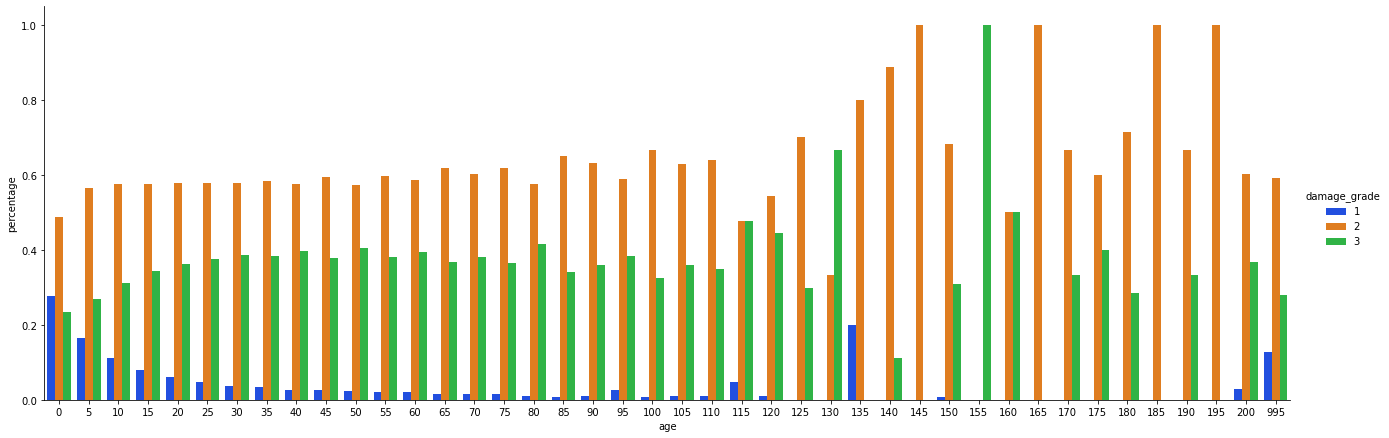

In [8]:
sb.catplot(data=aux, kind="bar", x="age", y="percentage", hue="damage_grade", palette="bright", alpha=1, height=6, aspect=3)

### Cantidad de pisos antes del terremoto
Se separan los edificios por cantidad de pisos antes del terremoto, y se grafica el porcentaje de edificios que tenian n pisos antes del terremoto que sufrieron cierto grado de daño. 

In [9]:
values = X_train["count_floors_pre_eq"].unique()
d2 = {"percentage": [], "count_floors_pre_eq" : [], "damage_grade": []}
for val in values:
    tot = train.query(f"count_floors_pre_eq == {val}").count().unique()[0]
    for dam in [1,2,3]:
        part = train.query(f"count_floors_pre_eq == {val}").query(f"damage_grade == {dam}").count().unique()[0]
        d2["percentage"].append(part/tot)
        d2["count_floors_pre_eq"].append(val)
        d2["damage_grade"].append(dam)
        
aux2 = pd.DataFrame(d2, index = range(len(d2["percentage"])))

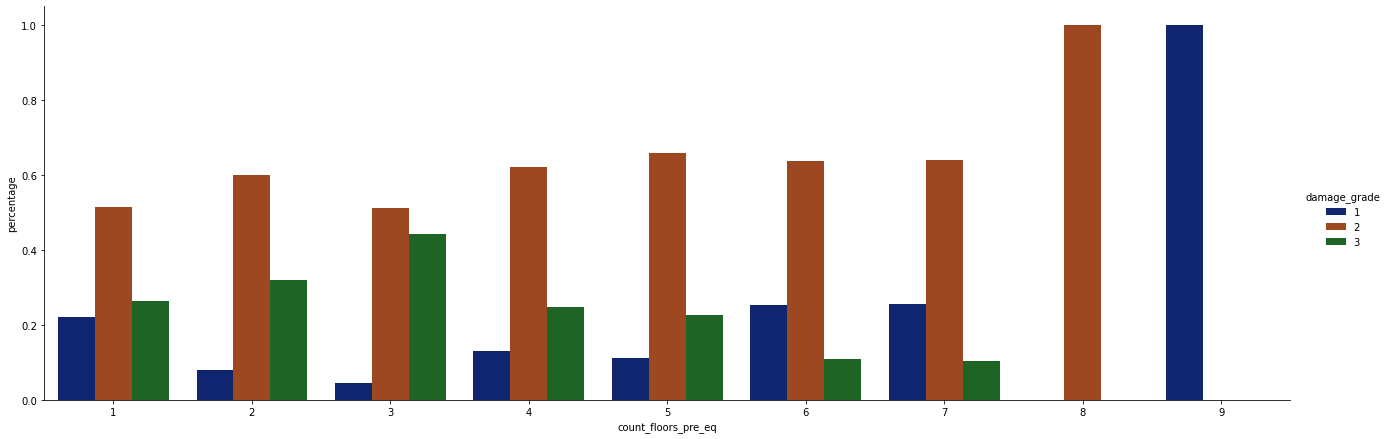

In [10]:
sb.catplot(data=aux2, kind="bar", x="count_floors_pre_eq", y="percentage", hue="damage_grade", palette="dark", alpha=1, height=6, aspect=3)

In [11]:
values = X_train["height_percentage"].unique()
d3 = {"percentage": [], "height_percentage" : [], "damage_grade": []}
for val in values:
    tot = train.query(f"height_percentage == {val}").count().unique()[0]
    for dam in [1,2,3]:
        part = train.query(f"height_percentage == {val}").query(f"damage_grade == {dam}").count().unique()[0]
        d3["percentage"].append(part/tot)
        d3["height_percentage"].append(val)
        d3["damage_grade"].append(dam)
        
aux3 = pd.DataFrame(d3, index = range(len(d3["percentage"])))

### Altura del edificio 
En este grafico se presenta la altura normalizada y el porcentaje de edificios de cierto tamaño que sufrieron algun grado de daño.

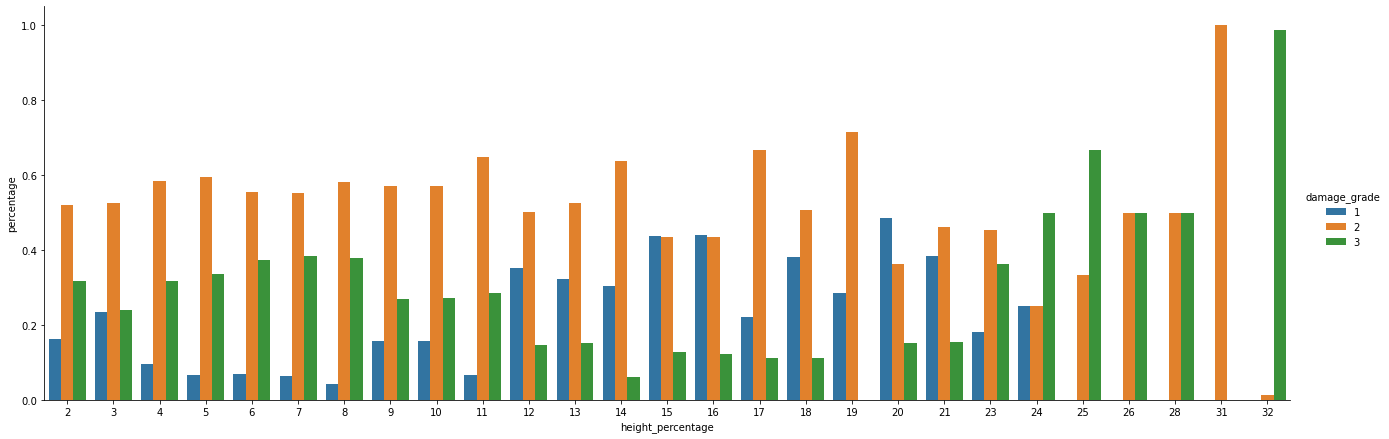

In [12]:
sb.catplot(data=aux3, kind="bar", x="height_percentage", y="percentage", hue="damage_grade", palette="tab10", alpha=1, height=6, aspect=3)

### Material del edificio
Estos graficos nos muestran la cantidad de edificios que sufrieron cierto grado de daño y el material con el que fueron construidos.

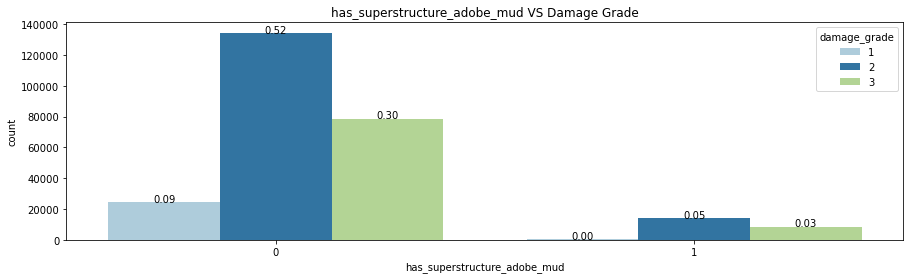

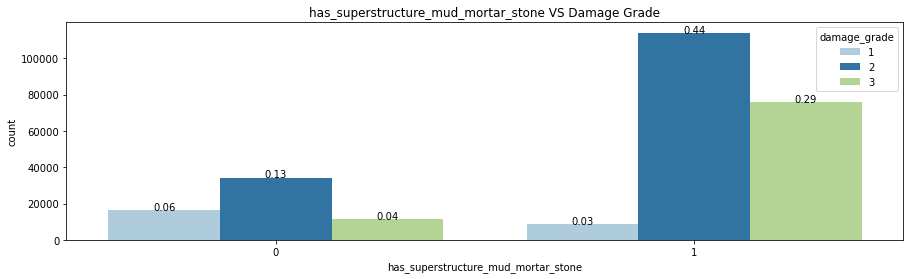

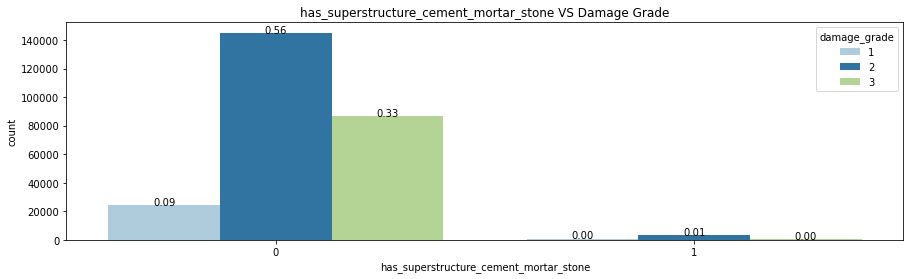

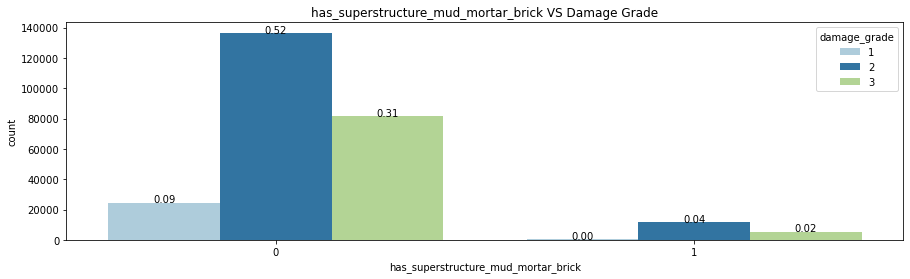

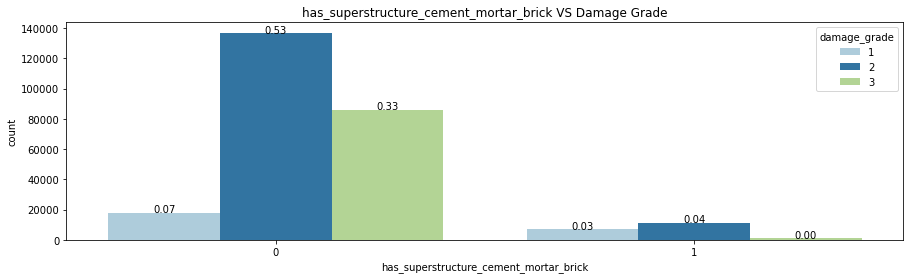

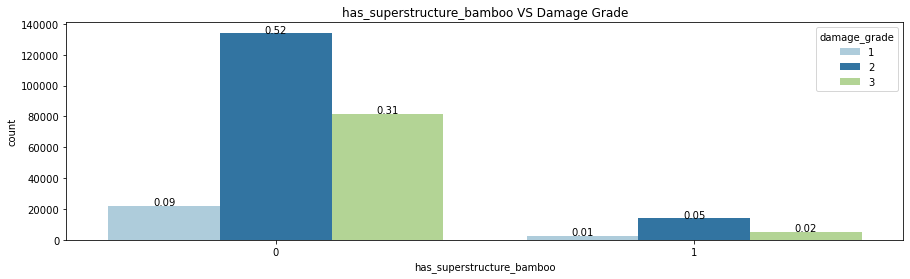

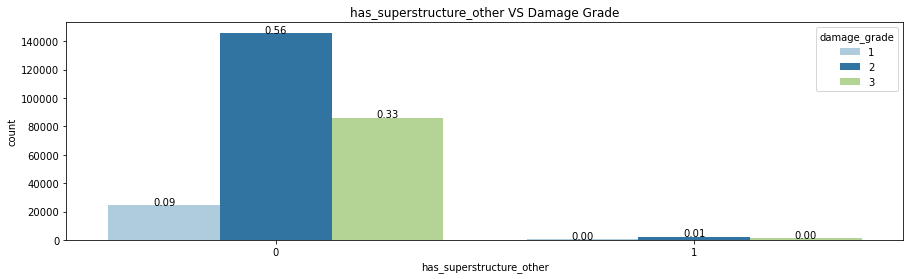

In [13]:
cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
        'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
        'has_superstructure_cement_mortar_brick', 'has_superstructure_bamboo', 
        'has_superstructure_other'
       ]

for c in cols:
    plt.figure(figsize=(15,4))
    total = float(len(train[c])) 
    ax = sb.countplot(x = train[c], hue=train.damage_grade, palette='Paired')
    plt.title(f"{c} VS Damage Grade")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 
    plt.show()

# Preprocesamiento

In [14]:
y_test.all(1).all()

True

El vector objetivo tiene todos sus datos en la categoría (1), por lo que para evitar posibles errores con los datos test los descartamos, además tenemos columnas que no son relevantes para el entrenamiento de los modelos por lo que también son descartadas.

In [4]:
y = pd.read_csv(os.path.join("..", "data", "train_labels.csv")).drop("building_id", axis=1)
X = pd.read_csv(os.path.join("..", "data", "train_values.csv")).drop(['building_id','count_families',
                                                                      'has_secondary_use',
                                                                      'has_secondary_use_agriculture',
                                                                      'has_secondary_use_hotel',
                                                                      'has_secondary_use_rental',
                                                                      'has_secondary_use_institution',
                                                                      'has_secondary_use_school',
                                                                      'has_secondary_use_industry',
                                                                      'has_secondary_use_health_post',
                                                                      'has_secondary_use_gov_office',
                                                                      'has_secondary_use_use_police',
                                                                      'has_secondary_use_other'], axis=1)

Tenemos 260000+, por lo que podemos crear una partición de los datos y trabajar con ellos.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.23, random_state=42)
print(f"Size of train Data: {len(X_train)}\nSize of test Data: {len(X_test)}")

Size of train Data: 200662
Size of test Data: 59939


Por otro lado, tenemos 8 columnas categóricas, necesitaremos transformarla a columnas binarias con *One hot encoder*

In [6]:
categorical_columns = []
for col in X_train.columns:
    if X_train[col].dtype == 'O':
        categorical_columns.append(col)
categorical_columns

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

Y tenemos 18 columnas númericas a las que aplicaremos un Standard Scaler

In [7]:
num_columns = []
for col in X_train.columns:
    if X_train[col].dtype == 'int64':
        num_columns.append(col)
num_columns

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [8]:
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    (StandardScaler(), num_columns),
    remainder="passthrough"
)

preprocessor_knn = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough"
)
X_processed_knn = preprocessor_knn.fit_transform(X_train)
X_processed_test_knn = preprocessor_knn.fit_transform(X_test)

X_processed = preprocessor.fit_transform(X_train)
X_processed_test = preprocessor.fit_transform(X_test)
X_processed.dtype

dtype('float64')

Además creamos un preprocesamiento sin Standard Scaler ya que Knn parace funcionar mucho mejor con los valores originales

# Modelo 1: K-Nearest Neighbors
Modelo que busca clasificar datos en función de la clasificación que tienen sus vecinos "más cercanos".

![](https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png)

In [20]:
Knn_grid = {"n_neighbors": np.arange(3, 15)}
results_knn = []

for n in range(1,15,1):
    knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn.fit(X_processed_knn, y_train["damage_grade"])
    r=knn.score(X = X_processed_test_knn, y = y_test["damage_grade"])
    print(f"neighbors: {n}, score: {r}")
    results_knn.append((r, n))

neighbors: 1, score: 0.6665276364303708
neighbors: 2, score: 0.6742688399873205
neighbors: 3, score: 0.6906354794040608
neighbors: 4, score: 0.6989606099534527
neighbors: 5, score: 0.7026643754483725
neighbors: 6, score: 0.7054505413837401
neighbors: 7, score: 0.7078696674952869
neighbors: 8, score: 0.707369158644622
neighbors: 9, score: 0.7069687515640901
neighbors: 10, score: 0.7086371143996396
neighbors: 11, score: 0.7065683444835583
neighbors: 12, score: 0.7056340612956505
neighbors: 13, score: 0.7050000834181418
neighbors: 14, score: 0.7043827891689884


In [21]:
results_knn.sort()
results_knn[-1]

(0.7086371143996396, 10)

# Modelo 2: Random Forest Classifier
Modelo que realiza predicciones con arboles de decisión pra luego ponderar en una predicción final

![](https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png)

In [22]:
Forest_grid = {
    "n_estimators": range(10, 100, 20),
    "max_depth": range(15, 50, 5)
}

results_Forest = []

for n in Forest_grid["n_estimators"]:
    for depth in Forest_grid["max_depth"]:
        RandomForest = RandomForestClassifier(n_estimators=n, max_depth=depth, n_jobs=-1)
        RandomForest.fit(X_processed, y_train["damage_grade"])
        r=RandomForest.score(X = X_processed_test, y = y_test["damage_grade"])
        print(f"estimators: {n}, depth= {depth}, score: {r}")
        results_Forest.append((r, n, depth))

estimators: 10, depth= 15, score: 0.6699310966148918
estimators: 10, depth= 20, score: 0.6791237758387694
estimators: 10, depth= 25, score: 0.6938721033050268
estimators: 10, depth= 30, score: 0.6955404661405763
estimators: 10, depth= 35, score: 0.6955237825122208
estimators: 10, depth= 40, score: 0.6916031298486794
estimators: 10, depth= 45, score: 0.6875656917866497
estimators: 30, depth= 15, score: 0.6732678222859908
estimators: 30, depth= 20, score: 0.6928544019753416
estimators: 30, depth= 25, score: 0.7037654949198352
estimators: 30, depth= 30, score: 0.7054505413837401
estimators: 30, depth= 35, score: 0.7061846210313819
estimators: 30, depth= 40, score: 0.7035986586362802
estimators: 30, depth= 45, score: 0.7028312117319274
estimators: 50, depth= 15, score: 0.6795074992909458
estimators: 50, depth= 20, score: 0.694856437378001
estimators: 50, depth= 25, score: 0.7055172758971621
estimators: 50, depth= 30, score: 0.7101052736949232
estimators: 50, depth= 35, score: 0.71013864095

In [23]:
results_Forest.sort()
results_Forest[-1]

(0.7127746542318023, 90, 35)

# Modelo 3: Neural Network

Tal como cerebro, este modelo posee neuronas que se conectan a través de las distintas capas. Cada neurona se compone de una regresión lineal que recibe los outputs de sus neuronas anteriores, esta regresión lineal se busca optimizar mediante el descenso del gradiente utilizando un algoritmo de Backpropagation. Pero distintas regresiones lineales solo pueden generar una regresión lineal, es por esto que se utiliza una función de activación, que es este caso es la función logística, para generar pertubaciones que acaben con la linealidad del sistema. De modo que se obtiene un algoritmo mucho más completo.

![](https://miro.medium.com/max/1034/0*5iKh73TFB2iWT3zU)

In [24]:
Nn_grid = {"alpha" :[0.1, 0.0001],
           "hidden_layer_sizes" : [(5,5), (6,6), (7,7)]
          }
results_nn = []
for alpha in Nn_grid["alpha"]:
    for layer in Nn_grid["hidden_layer_sizes"]:
        clf = MLPClassifier(solver='adam',
                            activation = "logistic",
                            alpha = alpha,
                            hidden_layer_sizes = layer,
                            random_state=2,
                            max_iter= 10000000,
                            learning_rate = "adaptive",
                            learning_rate_init = 0.0001)
        clf.fit(X_processed, y_train["damage_grade"])
        r = clf.score(X_processed_test, y_test["damage_grade"])
        print(f"For alpha {alpha}, layer {layer} the score is {r}")
        results_nn.append((r,alpha,layer))

For alpha 0.1, layer (5, 5) the score is 0.6103204925007091
For alpha 0.1, layer (6, 6) the score is 0.6110545721483508
For alpha 0.1, layer (7, 7) the score is 0.6119221208228366
For alpha 0.0001, layer (5, 5) the score is 0.6138907889687849
For alpha 0.0001, layer (6, 6) the score is 0.6164767513638866
For alpha 0.0001, layer (7, 7) the score is 0.6129398221525217


In [25]:
clf = MLPClassifier(solver='adam',
                    activation = "logistic",
                    alpha = 0.001,
                    hidden_layer_sizes = (56,8,3),
                    random_state=2,
                    max_iter= 10000000,
                    learning_rate = "adaptive",
                    learning_rate_init = 0.0001)
clf.fit(X_processed, y_train["damage_grade"])
r = clf.score(X_processed_test, y_test["damage_grade"])

In [26]:
results_nn.append((r, 0.1, (56, 8, 3)))
print(f"For alpha {0.001}, layer {(56, 8, 3)} the score is {r}")

For alpha 0.001, layer (56, 8, 3) the score is 0.6712324196266204


In [29]:
results_nn.sort()
results_nn[-1]

(0.6712324196266204, 0.001, (56, 8, 3))

# Modelo 4: Histogram-based Gradient Boosting Classification Tree
Versión optimizada del modelo Modelo Gradient Boosting Classification Tree, que establece prediciones a priori débiles con árboles de decisión para luego seguir estableciendo predicciones que le dan más peso a los datos no acertados y menos peso a los datos que ya están bien clasificados, de manera que se puede acumular el aprendizaje para establecer un modelo robusto de clasificación. 

![](https://tvas.me/assets/gbt-example.png)

In [27]:
rang=[1,.9,.8,.7,.6,.5,.4,.3,.2,.1,.05]
results_HGBC=[]
for rate in rang:
    HGBC = HistGradientBoostingClassifier(max_iter=200,learning_rate=rate, random_state=1)
    HGBC.fit(X_processed, y_train["damage_grade"])
    score=HGBC.score(X_processed_test, y_test["damage_grade"])
    print(f"rate: {rate}, score: {score}")
    results_HGBC.append((score,rate))

rate: 1, score: 0.6592368908390197
rate: 0.9, score: 0.6667111563422813
rate: 0.8, score: 0.6748193997230517
rate: 0.7, score: 0.6748694506081182
rate: 0.6, score: 0.6887669130282453
rate: 0.5, score: 0.7018135104022423
rate: 0.4, score: 0.7096881829860358
rate: 0.3, score: 0.718663975041292
rate: 0.2, score: 0.7209663157543502
rate: 0.1, score: 0.7161113799029013
rate: 0.05, score: 0.7090375214801715


In [28]:
results_HGBC.sort()
results_HGBC[-1]

(0.7209663157543502, 0.2)

# Modelos de clasificación de aprendizaje incremental
Modelos que establecen predicciones de manera progresiva, tomando porciones de la data completa y almacenado resultados de manera acumulativa.

In [29]:
from sklearn.linear_model import Perceptron

Perceptron = Perceptron()
Perceptron.fit(X_processed, y_train["damage_grade"])
Perceptron.score(X_processed_test, y_test["damage_grade"])

0.5126211648509318

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier

PassiveAggressiveClassifier = PassiveAggressiveClassifier()
PassiveAggressiveClassifier.fit(X_processed, y_train["damage_grade"])
PassiveAggressiveClassifier.score(X_processed_test, y_test["damage_grade"])

0.46128564040107445

In [31]:
from sklearn.naive_bayes import MultinomialNB

multi = MultinomialNB()
multi.fit(X_processed_knn, y_train["damage_grade"])
multi.score(X_processed_test_knn, y_test["damage_grade"])

0.2810857705333756

# Comparación de Resultados
Estos son los valores de precisión  de cada modelo planteado con sus respectivos parámetros óptimos:
* ### K-Nearest Neighbor
Score: 0.7086371143996396, Número de vecinos: 10
* ### Random Forest Classifier
Score: 0.7141093445002419, Número de árboles: 90, profundidad de los árboles: 30)
* ### Neural Network
Score: 0.6712324196266204, 0.001, (56, 8, 3))
* ### Histogram-based Gradient Boosting Classification Tree
Score: 0.7209663157543502, rate: 0.2 
* ### Perceptron
Score: 0.5126211648509318
* ### Passive Aggressive Classifier
Score: 0.5334089657818782
* ### Multinomial NB
Score: 0.2810857705333756

# Conclusiones
El modelo que mejor clasifica este conjunto de dato es el Histogram-based Gradient Boosting Classification Tree, aunque al ser un modelo en fase experimental puede ser arriesgado seleccionarlo, una elección más conservadora de mejor modelo clasificador sería Random Forest Classifier, que aunque es el modelo que más tiempo de ejecución toma, es bastante bueno para sobrellevar el overfitting gracias a su aleatoriedad.

¿Es posible extrapolar esto? Con un score de 0.7 consideramos que es lo suficientemente bueno para realizar una extrapolación. Pero para poder hacer una extrapolación realmente adecuada, sería necesario realizar este análisis para distintos terremotos a lo largo del mundo y además de tener datos Geoestadísticos más detallados.